In [1]:
import cartopy.crs as ccrs
import cmocean as cmo
import numpy as np
import matplotlib.pyplot as plt

In [2]:
HEM = 'sh'

In [3]:
def plot_metric2(u_data, v_data, lon, lat, metric):

    # Set longitude bounds for plot (full zonal coverage)
    lon_min = -180
    lon_max = 180

    # Set latitude bounds based on hemisphere
    if HEM == 'sh':
        lat_min = -90
        lat_max = -65
    elif HEM =='nh':
        lat_min = 65
        lat_max = 90

    # Define plot proection based on hempisphere
    if HEM == 'sh':
        projection = ccrs.SouthPolarStereo()
    elif HEM == 'nh':
        projection = ccrs.NorthPolarStereo()

    # Define data-to-plot's coordinate reference system
    # NOTE, used for 'crs' and 'transform' cartopy parameters
    crs = ccrs.PlateCarree()

    # Set color map
    cmap = cmo.cm.thermal  # red blue colormap from cmocean

    # Saturate colormap to show small values
    vmin = 10
    vmax = 0.05
    
    # Initialize subplots
    fig, axs = plt.subplots(
        nrows = 1,
        ncols = 2,
        figsize = (6,3),
        subplot_kw = {'projection': projection},
        constrained_layout = True
    )

    # Plot left plot; zonal evaluation
    axs[0].set_extent([lon_min, lon_max, lat_min, lat_max], crs = crs)
    axs[0].coastlines
    # Plot pcolormesh plot
    pcm_0 = axs[0].pcolormesh(
        lon, lat, u_data,
        transform = crs,
        cmap = cmap, 
        # vmin = vmin, 
        # vmax = vmax
    )
    # axs[0].set_title("zonal")
    # Add colorbar
    plt.colorbar(pcm_0, ax = axs[0], orientation = 'vertical')

    # Plot right plot; meridional evaluation
    axs[1].set_extent([lon_min, lon_max, lat_min, lat_max], crs = crs)
    axs[1].coastlines
    # Plot pcolormesh plot
    pcm_1 = axs[1].pcolormesh(
        lon, lat, v_data,
        transform = crs,
        cmap = cmap, 
        # vmin = vmin, 
        # vmax = vmax
    )
    # axs[1].set_title("meridional")
    # Add colorbar
    plt.colorbar(pcm_1, ax = axs[1], orientation = 'vertical')

    # Add title to plot
    fig.suptitle(f"{metric}", fontweight = 'bold')

    # Format with tight layout
    fig.tight_layout

    # Add text with means
    fig.text(0, -0.05, f"mean zonal {metric}: {np.nanmean(u_data):.4f}")
    fig.text(0.5, -0.05, f"mean meridional {metric}: {np.nanmean(v_data):.4f}")

    return

In [4]:
# Load coordinates
fnam = '/home/jbassham/jack/thesis-rough/data/coordinates/sh/01072026_1643/coord_sh19922020_01072026_1643.npz'

data = np.load(fnam)
lat = data['lat']
lon = data['lon']

In [5]:
# Load train outputs
fnam = "/home/jbassham/jack/thesis-rough/data/model-output/lr-wtd-cf/sh/01212026_1222/coef_fit_lr_wtd_cf_sh19922020_01212026_1222.npz"

data = np.load(fnam)

fit_tr = data['fit_tr']
true_tr = data['true_tr']
m = data['m']

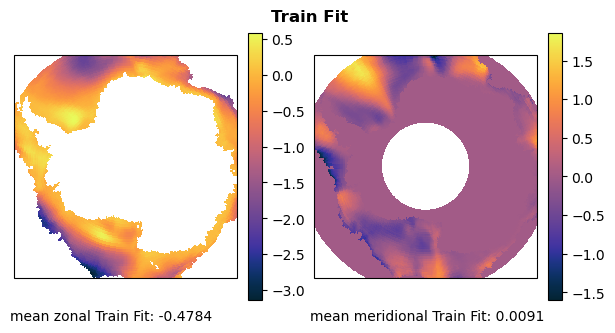

In [6]:
it = 180

u_out = fit_tr[it,0,:,:]
v_out = fit_tr[it,1,:,:]

metric = 'Train Fit'

plot_metric2(u_out, v_out, lon, lat, metric)

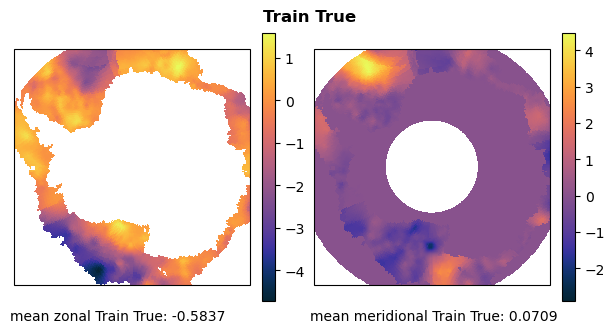

In [7]:
it = 180

u_out = true_tr[it,0,:,:]
v_out = true_tr[it,1,:,:]

metric = 'Train True'

plot_metric2(u_out, v_out, lon, lat, metric)

In [8]:
# Load test outputs
fnam = "/home/jbassham/jack/thesis-rough/data/model-output/lr-wtd-cf/sh/01212026_1222/preds_lr_wtd_cf_sh19922020_01212026_1222.npz"

data = np.load(fnam)

y_pred = data['y_pred']
y_true = data['y_true']

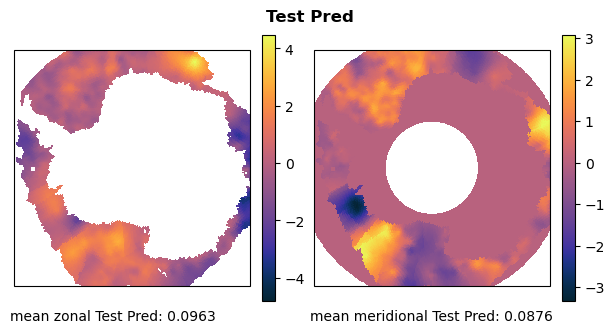

In [9]:
it = 180

u_out = y_pred[it,0,:,:]
v_out = y_pred[it,1,:,:]

metric = 'Test Pred'

plot_metric2(u_out, v_out, lon, lat, metric)

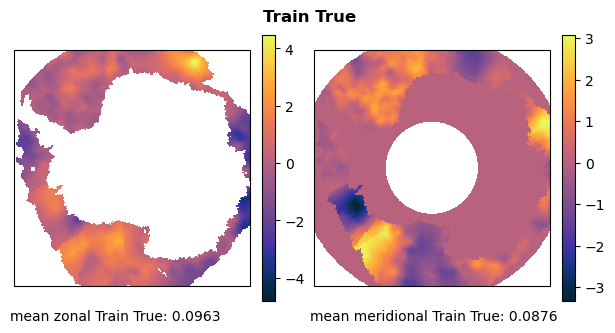

In [10]:
it = 180

u_out = y_true[it,0,:,:]
v_out = y_true[it,1,:,:]

metric = 'Train True'

plot_metric2(u_out, v_out, lon, lat, metric)

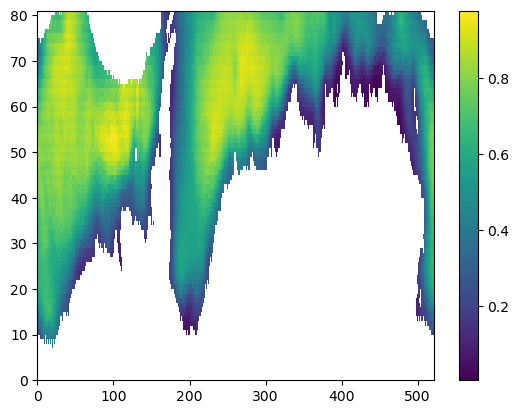

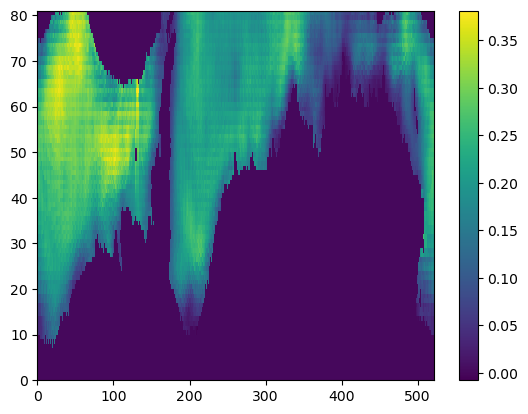

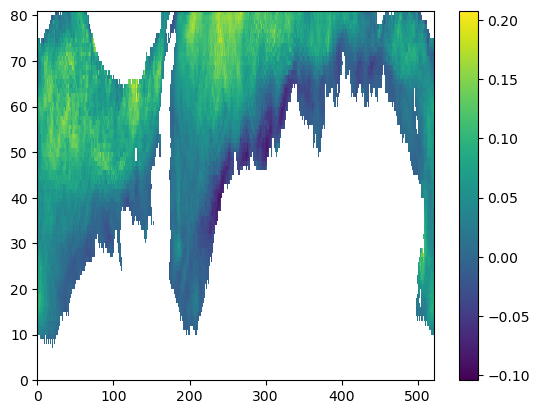

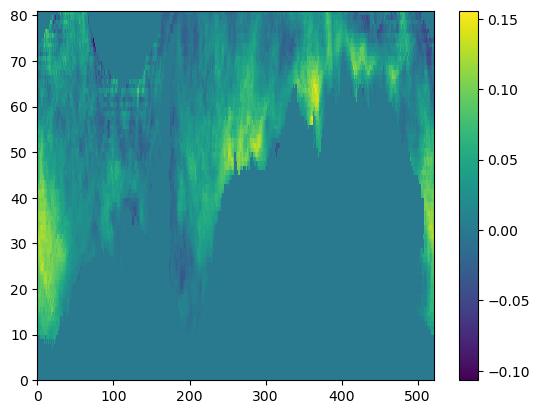

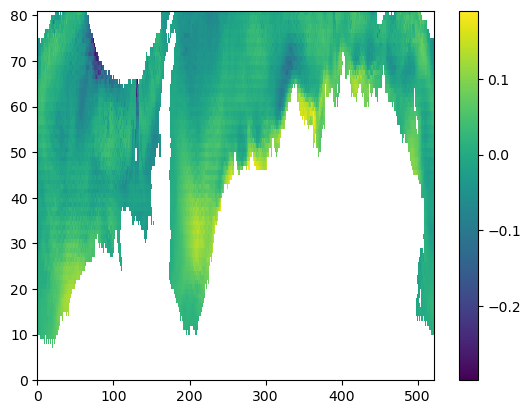

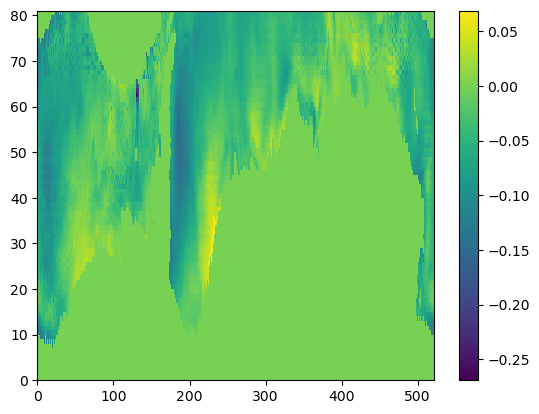

In [11]:
for im in m:
    plt.pcolormesh(im)
    plt.colorbar()
    plt.show()